In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import csv
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

In [3]:
#apptrain=pd.read_csv("application_train.csv")
apptrain=pd.read_csv("modedapptrain.csv")
bureau=pd.read_csv("bureau.csv")
bbal=pd.read_csv("bureau_balance.csv")
ccbal=pd.read_csv("credit_card_balance.csv")
innpay=pd.read_csv("installments_payments.csv")
POS=pd.read_csv("POS_CASH_balance.csv")
old=pd.read_csv("previous_application.csv")

__Preparing data__

In [30]:
'''apptrain["Gender"]=""
apptrain["OwnCar"]=""
apptrain["OwnRealty"]=""'''

In [31]:
'''for row_index,row in apptrain.iterrows():
    if row["CODE_GENDER"]=='M':
        apptrain.loc[row_index,"Gender"]=1
    elif row["CODE_GENDER"]=='F':
        apptrain.loc[row_index,"Gender"]=0'''

In [32]:
'''for row_index,row in apptrain.iterrows():
    if row["FLAG_OWN_CAR"]=='Y':
        apptrain.loc[row_index,"OwnCar"]=1
    elif row["FLAG_OWN_CAR"]=='N':
        apptrain.loc[row_index,"OwnCar"]=0'''

In [33]:
'''for row_index,row in apptrain.iterrows():
    if row["FLAG_OWN_REALTY"]=='Y':
        apptrain.loc[row_index,"OwnRealty"]=1
    elif row["FLAG_OWN_REALTY"]=='N':
        apptrain.loc[row_index,"OwnRealty"]=0'''

In [34]:
#apptrain.to_csv('modedapptrain.csv',sep=',',encoding='utf-8')

In [ ]:
apptrain.drop("Unnamed: 0",axis=1,inplace=True)

__Analyzing Data - GRAPHS__

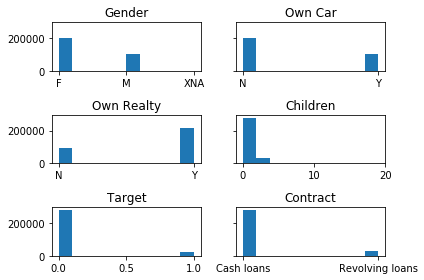

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.hist(apptrain["CODE_GENDER"], label="Gender")
ax0.set_title('Gender')
ax1.hist(apptrain["FLAG_OWN_CAR"], label="Own Car")
ax1.set_title('Own Car')
ax2.hist(apptrain["FLAG_OWN_REALTY"], label="Own Realty")
ax2.set_title('Own Realty')
ax3.hist(apptrain["CNT_CHILDREN"], label="Children")
ax3.set_title('Children')
ax4.hist(apptrain["TARGET"], label="Target")
ax4.set_title('Target')
ax5.hist(apptrain["NAME_CONTRACT_TYPE"], label="Contract")
ax5.set_title('Contract')
fig.tight_layout()
plt.show()

In [ ]:
#sns.heatmap(apptrain.iloc[1:].isnull(),vmin=0,vmax=2,xticklabels=True,yticklabels=True)

In [ ]:
sns.heatmap(apptrain.head(200000).isnull(),vmin=0,vmax=2)

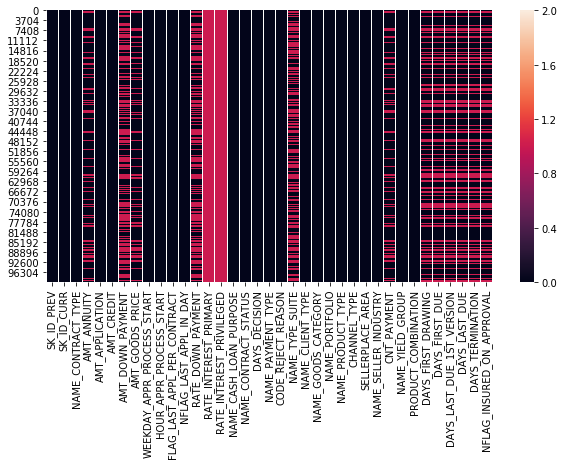

In [64]:
fig=plt.figure(figsize=(10, 5))
sns.heatmap(old.head(100000).isnull(),vmin=0,vmax=2)

__Analyzing Data - DataFrames__

In [7]:
old.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [59]:
apptrain.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307507.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.341648,0.340108,0.693673
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.474263,0.473746,0.460968
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,1.000000,1.000000,1.000000


# Rough Work

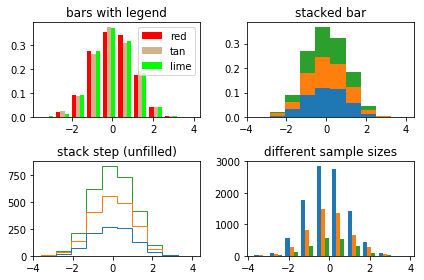

In [12]:
np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [69]:
count=apptrain.shape[0]


In [88]:
print(count/100)
print(count%100)

3075.11
11


In [84]:
limit=int(count/100)+int(count%100)

In [85]:
limit

3086

In [21]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [15]:
apptrain[10:20]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1
12,100016,0,Cash loans,F,N,Y,0,67500.000,80865.0,5881.5,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
13,100017,0,Cash loans,M,Y,N,1,225000.000,918468.0,28966.5,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0
14,100018,0,Cash loans,F,N,Y,0,189000.000,773680.5,32778.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
15,100019,0,Cash loans,M,Y,Y,0,157500.000,299772.0,20160.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1
16,100020,0,Cash loans,M,N,N,0,108000.000,509602.5,26149.5,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
17,100021,0,Revolving loans,F,N,Y,1,81000.000,270000.0,13500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
18,100022,0,Revolving loans,F,N,Y,0,112500.000,157500.0,7875.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
19,100023,0,Cash loans,F,N,Y,1,90000.000,544491.0,17563.5,...,0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,1


In [18]:
mydict={}

In [28]:
mydict=splitbyRows(apptrain,150000)

In [ ]:
mydict[3]

In [15]:
apptrain.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0,0


In [26]:
for i in range(1,10+1):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [11]:
    d = {}
    df=apptrain
    n=50000
    count=df.shape[0]
    print("count "+str(count))
    parts=int(count/n)
    print("parts "+ str(parts))
    remains=int(count%n)
    if remains>1:
        limit=parts+1
    else:
        limit=parts    
    fro=0
    to=0
    print("Limit"+str(limit))
    for one in range(1,limit+1):
        print(one)
        to=one*n
        print("to "+ str(to))
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
        print("fro"+str(fro))
        print("********")
    return d

count 307511
parts 6
Limit7
1
to 50000
fro50000
********
2
to 100000
fro100000
********
3
to 150000
fro150000
********
4
to 200000
fro200000
********
5
to 250000
fro250000
********
6
to 300000
fro300000
********
7
to 350000
fro350000
********


SyntaxError: 'return' outside function (<ipython-input-11-f1380a8fc64a>, line 26)

In [27]:
count/2

153755.5

In [53]:
df=apptrain
n=4
d = {}
count=df.shape[0]
print("count "+str(count))
parts=int(count/n)
print("parts "+ str(parts))
remains=int(count%n)
print("remains "+ str(remains))
'''if remains!=0:
    limit=parts+1
else:
    limit=parts '''   
fro=0
to=0
print("     ")
print("Limit"+str(limit))
for one in range(1,n+1):
    if remains>0 and one==n:
        to=parts*one+remains
    else:
        to=parts*one
    
    print("fro"+str(fro))
    print("to "+ str(to))
    d[one] =pd.DataFrame()
    d[one]=df[fro:to]
    fro=to
    
    print("********")

count 307511
parts 76877
remains 3
     
Limit7
fro0
to 76877
********
fro76877
to 153754
********
fro153754
to 230631
********
fro230631
to 307511
********


In [54]:
d[4]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Gender,OwnCar,OwnRealty
230631,367141,0,Cash loans,F,N,Y,2,108000.0,180000.0,12159.0,...,0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,1
230632,367142,0,Cash loans,F,N,Y,0,180000.0,755190.0,30078.0,...,0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0,1
230633,367143,1,Cash loans,M,N,Y,0,180000.0,270000.0,18171.0,...,0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,0,1
230634,367144,0,Cash loans,F,N,Y,0,90000.0,239850.0,23494.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
230635,367145,1,Revolving loans,F,Y,Y,0,157500.0,315000.0,15750.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
230636,367146,0,Cash loans,F,N,N,0,90000.0,508495.5,22527.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
230637,367147,0,Cash loans,F,N,Y,0,157500.0,276277.5,17032.5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
230638,367148,0,Revolving loans,M,Y,N,0,517500.0,450000.0,22500.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
230639,367149,0,Cash loans,F,N,Y,0,157500.0,1354500.0,41197.5,...,0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0,1
230640,367150,0,Cash loans,F,N,N,0,157500.0,900000.0,32328.0,...,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0,0


In [41]:
for one in range(1,4+1):
    
    if one==n:
        print("last"+ str(one))
    else:
        print(one)
    

1
2
3
last4


# Main Program 

In [21]:
def splitbyRows(df,n):
    d = {}
    count=df.shape[0]
    parts=int(count/n)
    remains=int(count%n)
    if remains>1:
        limit=parts+1
    else:
        limit=parts    
    fro=0
    to=0
    for one in range(1,limit+1):
        to=one*n
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
    return d    

In [55]:
def splitbyParts(df,n):
    d = {}
    count=df.shape[0]
    parts=int(count/n)
    remains=int(count%n)
    fro=0
    to=0
    for one in range(1,n+1):
        if remains>0 and one==n:
            to=parts*one+remains
        else:
            to=parts*one
        
        print("fro"+str(fro))
        print("to "+ str(to))
        d[one] =pd.DataFrame()
        d[one]=df[fro:to]
        fro=to
    return d

